In [1]:
import pandas as pd
import numpy  as np

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dados/emp_automovel.csv')
dados

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.000000,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.000000,0
1,9000.000000,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.000000,0
2,15750.000000,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.000000,0
3,9000.000000,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.000000,0
4,7650.000000,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.000000,0
...,...,...,...,...,...,...,...,...,...,...,...
54020,16855.246324,675.000000,12.157324,1,2.0,0.501213,0.180635,0.513171,0.082500,0.000000,1
54021,11250.000000,675.000000,14.000000,0,3.0,0.409620,0.606002,0.513171,0.117428,466.000000,1
54022,13500.000000,900.000000,64.000000,0,2.0,0.162632,0.525412,0.513171,0.117428,962.106056,1
54023,11250.000000,2371.500000,12.157324,0,3.0,0.501213,0.664027,0.513171,0.117428,482.000000,1


In [2]:
#dados já estão tratados

x = dados.drop(columns='inadimplente')
y = dados['inadimplente']

In [3]:
from sklearn.model_selection import train_test_split

x, x_teste, y, y_teste = train_test_split(x,y,test_size=0.15, stratify=y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x,y,stratify=y, random_state=5)


In [4]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino,y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val,y_val)}')

Acurácia de treino: 0.9205865272938444
Acurácia de validação: 0.9057573382109573


In [5]:
from sklearn.metrics import confusion_matrix

y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[10358   121]
 [  961    41]]


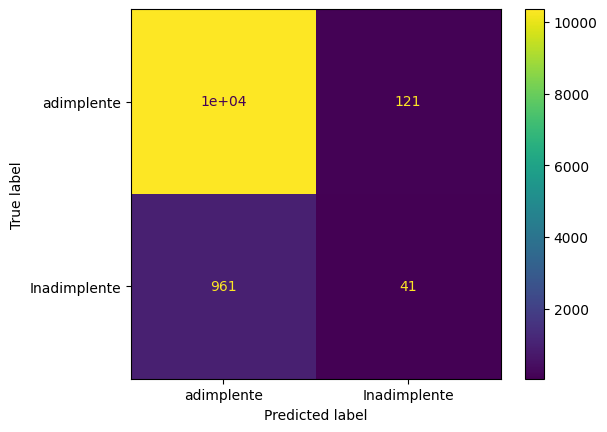

In [6]:
from sklearn.metrics import ConfusionMatrixDisplay

visualizacao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['adimplente', 'Inadimplente'])
visualizacao.plot();

In [7]:
from sklearn.metrics import accuracy_score

print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9057573382109573


In [8]:
from sklearn.metrics import precision_score, recall_score

print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall:   {recall_score(y_val, y_previsto)}')

Precisão: 0.25308641975308643
Recall:   0.04091816367265469


In [9]:
from sklearn.metrics import f1_score

print(f'F1-Score: {f1_score(y_val,y_previsto)}')

F1-Score: 0.070446735395189


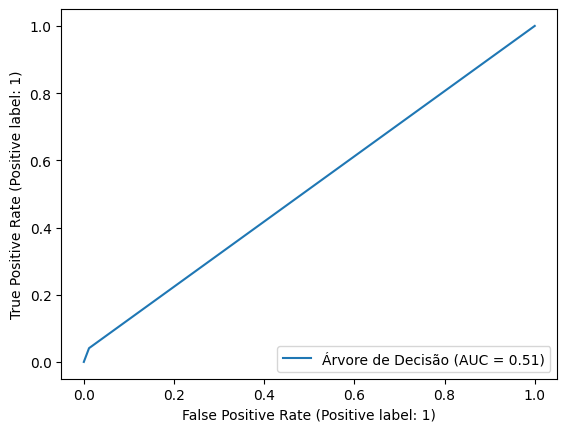

In [10]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [11]:
from sklearn.metrics import roc_auc_score

print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5146856301710921


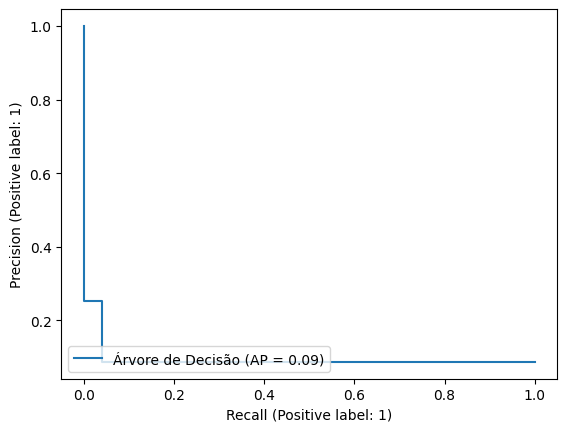

In [12]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_predictions(y_val,y_previsto,name='Árvore de Decisão');

In [17]:
from sklearn.metrics import average_precision_score

print(f'AP: {average_precision_score(y_val,y_previsto)}')

AP: 0.0940593416939827


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_val,y_previsto))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.25      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.58      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



In [20]:
from sklearn.model_selection import cross_validate, KFold

modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf)
cv_resultados

{'fit_time': array([0.33737326, 0.31125712, 0.33090568, 0.34526515, 0.30191207]),
 'score_time': array([0.00627732, 0.02073812, 0.00693965, 0.00617933, 0.00630331]),
 'test_score': array([0.91268372, 0.90755662, 0.90744774, 0.9135453 , 0.8997169 ])}

In [21]:
cv_resultados['test_score']

array([0.91268372, 0.90755662, 0.90744774, 0.9135453 , 0.8997169 ])

In [26]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()

print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

Intervalo de confiança: [0.8983262496120478, 0.9180538599818783]


In [27]:
def intervalo_conf(resultados):
  media = resultados['test_score'].mean()
  desvio_padrao = resultados['test_score'].std()
  print(f'Intervalo de confiança: [{media - 2 * desvio_padrao}, {min(media + 2 * desvio_padrao, 1)}]')

In [28]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=kf, scoring='recall')
cv_resultados

{'fit_time': array([0.30805707, 0.3683629 , 0.3323667 , 0.65304875, 0.74096489]),
 'score_time': array([0.01173019, 0.0185051 , 0.01242089, 0.0179553 , 0.02571344]),
 'test_score': array([0.02642008, 0.01856436, 0.0196802 , 0.01436031, 0.02312139])}

In [29]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.012231289329808192, 0.028627243908997103]


In [30]:
dados['inadimplente'].value_counts(normalize = True)

0    0.912707
1    0.087293
Name: inadimplente, dtype: float64

In [31]:
from sklearn.model_selection import StratifiedKFold

modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.22886729, 0.22754359, 0.24162912, 0.21544909, 0.21376419]),
 'score_time': array([0.00776124, 0.0078671 , 0.00905561, 0.00783277, 0.00875425]),
 'test_score': array([0.03366584, 0.02746567, 0.03117207, 0.02369077, 0.02618454])}

In [32]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.021315942287421043, 0.0355556116616638]


In [33]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x,y)

0    0.5
1    0.5
Name: inadimplente, dtype: float64

In [36]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.68026662, 0.65042782, 0.68846464, 0.67668271, 0.53347802]),
 'score_time': array([0.02693224, 0.01655436, 0.01925087, 0.01996326, 0.01708889]),
 'test_score': array([0.72429015, 0.73633978, 0.73875701, 0.74579506, 0.74397518])}

In [37]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7226626972578026, 0.7530001730800803]


In [39]:
from imblearn.pipeline import Pipeline as imbpipeline

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [40]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.77710533, 0.74940515, 0.75711155, 0.75489473, 0.77907658]),
 'score_time': array([0.01361871, 0.01318979, 0.01299548, 0.01284385, 0.01410174]),
 'test_score': array([0.25311721, 0.23595506, 0.25810474, 0.26433915, 0.19950125])}

In [41]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.19551754264222898, 0.2888894174855414]


In [42]:
from imblearn.under_sampling import NearMiss

modelo = DecisionTreeClassifier(max_depth=10)
pipeline = imbpipeline([('udnersample', NearMiss(version=3)), ('arvore', modelo)])
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring='recall')
cv_resultados

{'fit_time': array([0.72056341, 0.50183582, 0.51187515, 0.38812542, 0.39602828]),
 'score_time': array([0.01250267, 0.03598833, 0.01254654, 0.02817106, 0.00801563]),
 'test_score': array([0.67955112, 0.62546816, 0.67082294, 0.67830424, 0.65586035])}

In [43]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6217622312687378, 0.7022404959954985]


              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



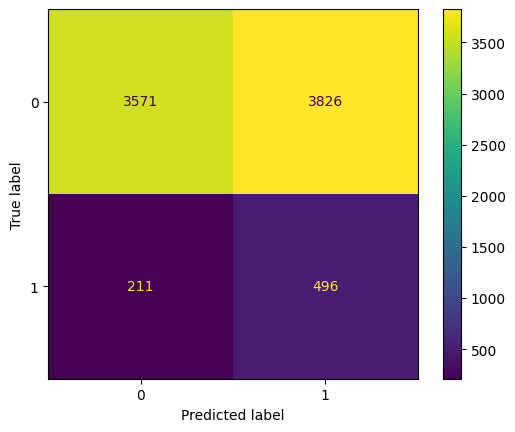

In [47]:
undersample = NearMiss(version = 3)
x_balanceado, y_balanceado = undersample.fit_resample(x,y)

modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

print(classification_report(y_teste, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);